    
   # Data Bootcamp Final Project: NBA Peak Age 1952-2016
   ## by Richard Son

In a lifecycle, peak age of athleticism is generally thought to be between 25-35. How does this translate to professional sports? Presumably, different sports have varying peak age years - European soccer players develop in proffesional teams at a far younger age than, say, golf, or American football.

Knowing this, what is the peak age of performance in the NBA? How has peak age changed over time? What, if any, is driving this change?

I will focus on key "effectiveness" stats across a player's career and indicate the "best" year that player had relative to his own career. This should give us cross-sectional data of "peak age year" per player across time from 1952 to 2016. Given this, I should be able to compare the peak productivity age across structural shocks in the NBA.

I expect to find a growing "peak age" but remains to be seen if this growth is due to our health and wellness improvements as a society or NBA related drivers. Even if we cannot completely distinguish the drivers, we should be able to answer the main question of "what is NBA peak age and does it vary due to shocks", which could prove valuable to front office mangement.

## Data
The data set I will be using has 6000+ players over 60+ years and 50+ column features (https://www.kaggle.com/drgilermo/nba-players-stats). It is stored as a csv file in a local drive. 

The main variables examined are Player, Age, Minutes Played (MP), True Shooting % (TS%), Win Shares (WS), and Value over Replacement (VORP).

MP - total minutes played by the player in the season  

TS% - aggregated % of made shots over shots taken, including 2pt, 3pt, and Free Throw shots   

WS - measure of wins contributed by player to total team wins   

VORP - measure of player contribution to team over a theoretical replacement player of minimum salary   



In [1]:
import pandas as pd # key tool 
import matplotlib.pyplot as plt # plotting tool
import numpy as np


/Users/Heyunsean/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


   
   
First, import dataset from local file and check data for validity.  


In [2]:
nba = pd.read_csv("/Users/Heyunsean/Desktop/Data_Bootcamp/PROJECT/SeasonsStats.csv")  

print("Variable dtypes:\n", nba.dtypes, sep='')

nba.tail()
# check data

Variable dtypes:
Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           f

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


Looks like the full dataset is all there but there are a number of statitstics we actually won't need for this question. Since I'm interested in knowing the overall value of a player (relative to his own career), I will discard primitive stats like points and assists and focus on Player Efficieny Rating(PER), True Shooting % (TS%), Win Shares (WS) and Value over Replacement (VORP). PER, WS, and VORP all already take into account for points, assists, rebounds and the like. Below, I drop all the stats I don't need.

In [3]:
nba.drop('Unnamed: 0', axis=1, inplace=True)
nba.drop('GS', axis=1, inplace=True)
nba.drop('3PAr', axis=1, inplace=True)
nba.drop('FTr', axis=1, inplace=True)
nba.drop('ORB%', axis=1, inplace=True)
nba.drop('DRB%', axis=1, inplace=True)
nba.drop('TRB%', axis=1, inplace=True)
nba.drop('AST%', axis=1, inplace=True)
nba.drop('STL%', axis=1, inplace=True)
nba.drop('BLK%', axis=1, inplace=True)
nba.drop('TOV%', axis=1, inplace=True)
nba.drop('OWS', axis=1, inplace=True)
nba.drop('DWS', axis=1, inplace=True)
nba.drop('WS/48', axis=1, inplace=True)
nba.drop('OBPM', axis=1, inplace=True)
nba.drop('DBPM', axis=1, inplace=True)
nba.drop('FG', axis=1, inplace=True)
nba.drop('FGA', axis=1, inplace=True)
nba.drop('FG%', axis=1, inplace=True)
nba.drop('3P', axis=1, inplace=True)
nba.drop('3PA', axis=1, inplace=True)
nba.drop('3P%', axis=1, inplace=True)
nba.drop('2P', axis=1, inplace=True)
nba.drop('2PA', axis=1, inplace=True)
nba.drop('2P%', axis=1, inplace=True)
nba.drop('eFG%', axis=1, inplace=True)
nba.drop('FT', axis=1, inplace=True)
nba.drop('FTA', axis=1, inplace=True)
nba.drop('FT%', axis=1, inplace=True)
nba.drop('ORB', axis=1, inplace=True)
nba.drop('DRB', axis=1, inplace=True)
nba.drop('TRB', axis=1, inplace=True)
nba.drop('AST', axis=1, inplace=True)
nba.drop('STL', axis=1, inplace=True)
nba.drop('BLK', axis=1, inplace=True)
nba.drop('TOV', axis=1, inplace=True)
nba.drop('PF', axis=1, inplace=True)
nba.drop('PTS', axis=1, inplace=True)
nba.drop('USG%', axis=1, inplace=True)
nba.drop('BPM', axis=1, inplace=True)

nba.drop('blanl', axis=1, inplace=True)
nba.drop('blank2', axis=1, inplace=True)
nba.tail()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,WS,VORP
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,1725.0,16.7,0.604,5.6,1.8
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,525.0,13.0,0.508,1.0,-0.1
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,108.0,7.3,0.346,0.0,-0.1
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,843.0,6.9,0.503,0.5,-0.4
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,609.0,17.0,0.547,1.1,-0.1


In [4]:
nba.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,WS,VORP
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,0.368,3.5,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,0.435,2.2,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,0.394,3.6,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,0.312,-0.6,NaN
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,0.308,-0.6,NaN


Drop 1950 and 1951 - no minutes played, PER and VORP

In [5]:
df = pd.DataFrame(nba)
df = df[df.Year != 1950]
df = df[df.Year != 1951]
df = df[df.Year.notnull()]
df.head()


,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,WS,VORP
488,1952.0,Paul Arizin*,SF,23.0,PHW,66.0,2939.0,25.5,0.546,16.0,NaN
489,1952.0,Cliff Barker,SG,31.0,INO,44.0,494.0,10.8,0.343,0.1,NaN
490,1952.0,Don Barksdale*,PF,28.0,BLB,62.0,2014.0,15.8,0.409,1.5,NaN
491,1952.0,Leo Barnhorst,SF,27.0,INO,66.0,2344.0,15.9,0.419,4.7,NaN
492,1952.0,Elmer Behnke,C,22.0,MLH,4.0,55.0,7.8,0.319,-0.1,NaN


As you can see, VORP was not recorded in 1952 either - the league began recording VORP in 1974. Normally, we would focus on stats available to all players, but VORP is a great measure of a player's worth. We keep this for now for further analysis later.  

First, we begin by grouping key variables Player and Age, then display their respective value. We will examine WS first. 

In [6]:
grouped = df.groupby(["Player", "Age"]) # Groupby region and year

player_age = grouped["WS"].mean() #/ grouped["adulteq"+ year].sum() # Average consumption 

player_age

Player              Age 
A.C. Green          22.0     3.300000
                    23.0     7.600000
                    24.0     7.900000
                    25.0     9.400000
                    26.0     7.700000
                    27.0     6.100000
                    28.0     8.800000
                    29.0     8.600000
                    30.0     9.300000
                    31.0     6.700000
                    32.0     4.400000
                    33.0     3.200000
                    34.0     5.200000
                    35.0     1.400000
                    36.0     5.000000
                    37.0     3.200000
A.J. Bramlett       23.0    -0.200000
A.J. English        23.0     0.200000
                    24.0     0.900000
A.J. Guyton         22.0     0.300000
                    23.0     0.100000
                    24.0    -0.100000
A.J. Hammons        24.0     0.000000
A.J. Price          23.0     1.200000
                    24.0     0.300000
                    25.0 

The data shows each players' ages played in the league - for example, A.C. Green played from ages 22-37 while A.J. Bramlett only played one year at age 23. Next, we'll unstack the splits and show the max range of ages in the history of the NBA as columns, Players in rows, and their WS stat as values.

In [7]:
player_age = player_age.unstack(level=-1)
player_age

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,3.300000,7.600000,7.900000,9.400000,7.700000,6.100000,...,1.4,5.0,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. English,NaN,NaN,NaN,NaN,NaN,0.200000,0.900000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,0.300000,0.100000,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,1.200000,0.300000,0.700000,2.200000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,1.400000,3.600000,5.500000,0.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, create 2 columns "Best_WS" and "Best_Age" to indicate each player's highest WS value and the age they acheived it.

In [8]:
player_age['Best_WS'] = player_age.max(axis=1)
player_age['Best_Age'] = player_age.idxmax(axis=1)
player_age

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,Best_WS,Best_Age
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,3.300000,7.600000,7.900000,9.400000,7.700000,6.100000,...,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400000,25.0
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000,23.0
A.J. English,NaN,NaN,NaN,NaN,NaN,0.200000,0.900000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,24.0
A.J. Guyton,NaN,NaN,NaN,NaN,0.300000,0.100000,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,22.0
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,24.0
A.J. Price,NaN,NaN,NaN,NaN,NaN,1.200000,0.300000,0.700000,2.200000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200000,26.0
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,26.0
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,24.0
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,1.400000,3.600000,5.500000,0.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000,25.0


Now that I've indicated the best performance year per player respective to their own career, I can find the mean value per age. I purposely find the best year relative to own's career to see the true relative peak year, not simply league-wide per age average.

In [10]:
player_age.mean()

Age
18.0         0.546154
19.0         1.282555
20.0         2.079026
21.0         2.325063
22.0         1.840236
23.0         2.098698
24.0         2.523376
25.0         2.988660
26.0         3.197722
27.0         3.346474
28.0         3.479759
29.0         3.451768
30.0         3.277326
31.0         3.131628
32.0         2.951912
33.0         2.798561
34.0         2.810594
35.0         2.716901
36.0         2.598060
37.0         2.214266
38.0         1.997863
39.0         2.179545
40.0         2.187500
41.0         1.520000
42.0         0.633333
43.0         0.900000
44.0         0.000000
Best_WS      3.013331
Best_Age    24.756915
dtype: float64

Throw this series into a dataframe for further analysis.

In [12]:
age_value = pd.DataFrame(player_age.mean())

rn = {0:"WS"}
age_value=age_value.rename(columns=rn)
age_value

,WS
Age,
18.0,0.546154
19.0,1.282555
20.0,2.079026
21.0,2.325063
22.0,1.840236
23.0,2.098698
24.0,2.523376
25.0,2.988660
26.0,3.197722


So far, we can see summary statistics - average WS per realtive peak age, average best year value, and average best age. The mean age is around 25 for WS. Next I drop the Best_WS and Best_Age rows and plot the data.

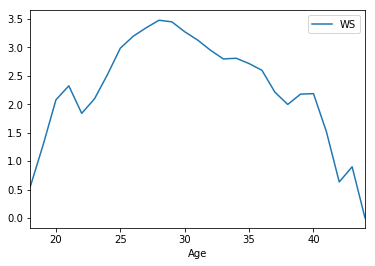

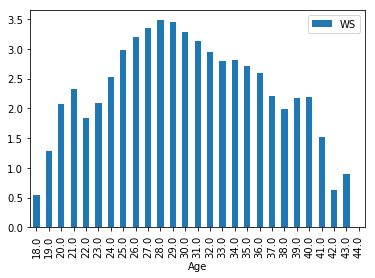

In [14]:
age_value.drop('Best_WS', inplace=True)
age_value.drop('Best_Age', inplace=True)
age_value.plot()
age_value.plot(kind='bar')
plt.show()

Off the bat, our charts look somewhat like what we expected - a bell curve type shape over a long 1952-2017 period. It seems like there are some outliers at the lower and upper ends. We will see if this persists or is a result of WS stat. Our next steps will be to compare different stats at different periods for a deeper look. Notice that previously average Best Age was 25, but our graphs show us a different insight - peak performance (in WS) seems to be closer to age 28.

In [18]:
# group by player and age, select value examined and unstack, charts hidden for viewing
# repeating above operations
grouped2 = df.groupby(["Player", "Age"]) 
player_age_VORP = grouped2["VORP"].mean() 
player_age_VORP = player_age_VORP.unstack(level=-1)
player_age_VORP

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.900000,2.100000,2.000000,2.700000,1.600000,1.400000,...,-0.2,0.9,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. English,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.400000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,-0.600000,-0.400000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.000000,-0.300000,0.000000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000,1.600000,-0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
player_age_VORP['Best_VORP'] = player_age_VORP.max(axis=1)
player_age_VORP['Best_Age'] = player_age_VORP.idxmax(axis=1)
player_age_VORP

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,Best_VORP,Best_Age
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.900000,2.100000,2.000000,2.700000,1.600000,1.400000,...,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.900000,29.0
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000,23.0
A.J. English,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.400000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,23.0
A.J. Guyton,NaN,NaN,NaN,NaN,-0.600000,-0.400000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,24.0
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,24.0
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.000000,-0.300000,0.000000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,26.0
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,26.0
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000,1.600000,-0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,25.0


In [20]:
age_value_VORP = pd.DataFrame(player_age_VORP.mean())

rn = {0:"VORP"}
age_value_VORP=age_value_VORP.rename(columns=rn)
age_value_VORP

,VORP
Age,
18.0,-0.092308
19.0,0.035220
20.0,0.382331
21.0,0.509074
22.0,0.347503
23.0,0.429954
24.0,0.585092
25.0,0.779248
26.0,0.848038


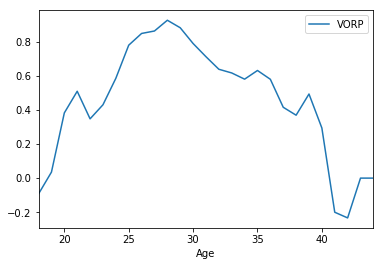

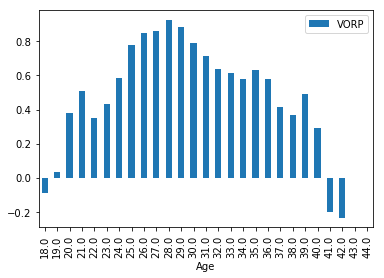

In [21]:
age_value_VORP.drop('Best_Age', inplace=True)
age_value_VORP.drop('Best_VORP', inplace=True)
age_value_VORP.plot()
age_value_VORP.plot(kind='bar')
plt.show()

We observe a more defined bell curve; VORP seems vary a bit more than WS. Peak age in VORP also shows 28. Ages 22-28 accelerates faster than deceleration after 28 - probably due to learning the sport and developing physically in earlier stages. Ages 41 and 42 show negative VORP, meaning their respective teams are better off by substituting the 41/42 year old. Same case for 18 year olds - since they do not go through college and were drafted straight from high school, it makes sense they would take a couple year to develop and provide value. Next, we examine MP (minutes played) as a rough measure of durability and talent - but, does a player play more minutes because he is simply more experienced or becuase they are physically more durable? 

In [22]:
grouped3 = df.groupby(["Player", "Age"]) 
player_age_MP = grouped3["MP"].mean() 
player_age_MP = player_age_MP.unstack(level=-1)
player_age_MP

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,1542.0,2240.000000,2636.000000,2510.000000,2709.000000,2164.000000,...,924.0,1929.0,1411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. English,NaN,NaN,NaN,NaN,NaN,1443.000000,1665.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,630.0,607.000000,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,865.000000,795.000000,568.000000,1278.000000,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,608.000000,1998.000000,2919.000000,856.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
player_age_MP['Best_MP'] = player_age_MP.max(axis=1)
player_age_MP['Best_Age'] = player_age_MP.idxmax(axis=1)
player_age_MP

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,Best_MP,Best_Age
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,1542.0,2240.000000,2636.000000,2510.000000,2709.000000,2164.000000,...,1411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902.000000,28.0
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,23.0
A.J. English,NaN,NaN,NaN,NaN,NaN,1443.000000,1665.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1665.000000,24.0
A.J. Guyton,NaN,NaN,NaN,NaN,630.0,607.000000,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.000000,22.0
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,24.0
A.J. Price,NaN,NaN,NaN,NaN,NaN,865.000000,795.000000,568.000000,1278.000000,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.000000,26.0
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,26.0
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,24.0
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,608.000000,1998.000000,2919.000000,856.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919.000000,25.0


In [24]:
age_value_MP = pd.DataFrame(player_age_MP.mean())

rn = {0:"MP"}
age_value_MP=age_value_MP.rename(columns=rn)
age_value_MP

,MP
Age,
18.0,404.230769
19.0,1071.352025
20.0,1232.033708
21.0,1284.673077
22.0,1061.585974
23.0,1102.510965
24.0,1230.384087
25.0,1378.630667
26.0,1439.649927


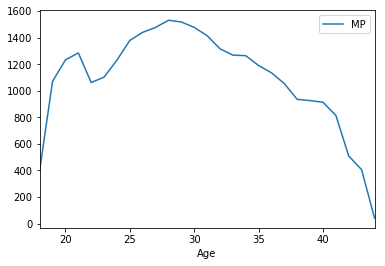

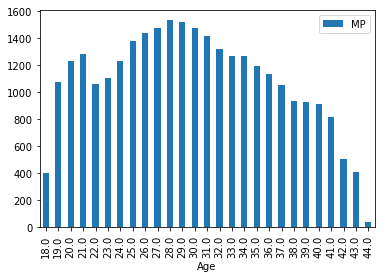

In [25]:
age_value_MP.drop('Best_Age', inplace=True)
age_value_MP.drop('Best_MP', inplace=True)
age_value_MP.plot()
age_value_MP.plot(kind='bar')
plt.show()

Again, data follows general bell curve but there is significant spikes in 19/20/21 year olds. This could be attributed to coaches playing younger player more for development. Notice how minutes drop off at age 22 and start to climb again. It seems ages 19-21 is a key time for NBA players. Furthermore, peak minutes also sits at age 28, and drops fairly steadily after; this supports durability measure over experience. Otherwise, 32/33 year olds would play around the same minutes because they are "experienced". Also, notice how 19 year olds play fairly close minutes to 20 and 21 year olds, yet on the VORP analysis, 19 year olds are far less valuable than 20/21 ages. 

Next, we analyze different league wide shocks and their possible effects. The two main we examine are: 

1979 - 3 pt line added  

2001 - Development League added  

We revert back to the original nba dataset and drop all players before 1979 to examine 3pt line adoption effects. Operations are similar to the above.


In [27]:
df_3pt = pd.DataFrame(nba)
#df-3pt = df[df.Year.notnull()]
df_3pt = df_3pt[df_3pt['Year'] > 1978]
df_3pt.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,WS,VORP
5382,1979.0,Kareem Abdul-Jabbar*,C,31.0,LAL,80.0,3157.0,25.5,0.612,14.4,7.8
5383,1979.0,Tom Abernethy,PF,24.0,GSW,70.0,1219.0,13.6,0.550,3.7,0.8
5384,1979.0,Alvan Adams,C,24.0,PHO,77.0,2364.0,20.4,0.570,7.6,4.1
5385,1979.0,Lucius Allen,PG,31.0,KCK,31.0,413.0,8.7,0.416,0.1,-0.2
5386,1979.0,Kim Anderson,SF,23.0,POR,21.0,224.0,3.0,0.353,-0.4,-0.4


In [28]:
grouped4 = df_3pt.groupby(["Player", "Age"]) 
player_age_VORP_3pt = grouped4["VORP"].mean() 
player_age_VORP_3pt = player_age_VORP_3pt.unstack(level=-1)
player_age_VORP_3pt

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.900000,2.100000,2.000000,2.700000,1.600000,1.400000,...,-0.2,0.9,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. English,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.400000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,-0.600000,-0.400000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.000000,-0.300000,0.000000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000,1.600000,-0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Gordon,NaN,-0.2,1.800000,0.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
player_age_VORP_3pt['Best_VORP'] = player_age_VORP_3pt.max(axis=1)
player_age_VORP_3pt['Best_Age'] = player_age_VORP_3pt.idxmax(axis=1)
player_age_VORP_3pt

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,Best_VORP,Best_Age
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.900000,2.100000,2.000000,2.700000,1.600000,1.400000,...,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.900000,29.0
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000,23.0
A.J. English,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.400000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,23.0
A.J. Guyton,NaN,NaN,NaN,NaN,-0.600000,-0.400000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,24.0
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,24.0
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.000000,-0.300000,0.000000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,26.0
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,26.0
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000,1.600000,-0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,25.0
Aaron Gordon,NaN,-0.2,1.800000,0.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,20.0


In [30]:
age_value_VORP_3pt = pd.DataFrame(player_age_VORP_3pt.mean())

rn = {0:"VORP"}
age_value_VORP_3pt = age_value_VORP_3pt.rename(columns=rn)
age_value_VORP_3pt

,VORP
Age,
18.0,-0.075000
19.0,0.044984
20.0,0.362934
21.0,0.483802
22.0,0.353942
23.0,0.439483
24.0,0.582935
25.0,0.757096
26.0,0.829633


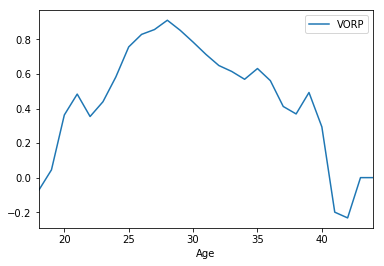

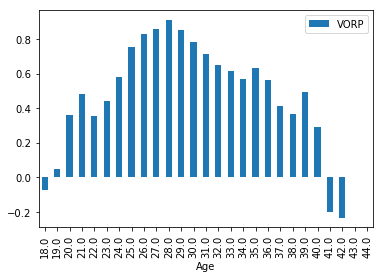

In [31]:
age_value_VORP_3pt.drop('Best_Age', inplace=True)
age_value_VORP_3pt.drop('Best_VORP', inplace=True)
age_value_VORP_3pt.plot()
age_value_VORP_3pt.plot(kind='bar')
plt.show()

It seems like the 3pt implementation did not hold much affect to VORP value. This chart is very similar to the 1952-2016 VORP graph. But what about True Shooting %? That should be directly impacted by a 3pt shot introduction. We analyze below.

In [32]:
grouped5 = df_3pt.groupby(["Player", "Age"]) 
player_age_TS_3pt = grouped5["TS%"].mean() 
player_age_TS_3pt = player_age_TS_3pt.unstack(level=-1)
player_age_TS_3pt

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.564000,0.599000,0.581000,0.594000,0.548000,0.556000,...,0.441,0.482,0.492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,0.190000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. English,NaN,NaN,NaN,NaN,NaN,0.480000,0.480000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,0.495000,0.477000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,0.472000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.530000,0.454000,0.454000,0.501000,0.469000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.535000,0.521000,0.549000,0.495667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Gordon,NaN,0.517,0.541000,0.530,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
player_age_TS_3pt['Best_TS'] = player_age_TS_3pt.max(axis=1)
player_age_TS_3pt['Best_Age'] = player_age_TS_3pt.idxmax(axis=1)
player_age_TS_3pt

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,Best_TS,Best_Age
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.564000,0.599000,0.581000,0.594000,0.548000,0.556000,...,0.492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603000,29.0
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,0.190000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190000,23.0
A.J. English,NaN,NaN,NaN,NaN,NaN,0.480000,0.480000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,23.0
A.J. Guyton,NaN,NaN,NaN,NaN,0.495000,0.477000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495000,22.0
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,0.472000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.472000,24.0
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.530000,0.454000,0.454000,0.501000,0.469000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.530000,23.0
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387000,26.0
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.535000,0.521000,0.549000,0.495667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549000,25.0
Aaron Gordon,NaN,0.517,0.541000,0.530,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.541000,20.0


In [34]:
age_value_TS_3pt = pd.DataFrame(player_age_TS_3pt.mean())

rn = {0:"TS%"}
age_value_TS_3pt = age_value_TS_3pt.rename(columns=rn)
age_value_TS_3pt

,TS%
Age,
18.0,0.473333
19.0,0.487165
20.0,0.500575
21.0,0.500888
22.0,0.494960
23.0,0.499856
24.0,0.501567
25.0,0.511973
26.0,0.513480


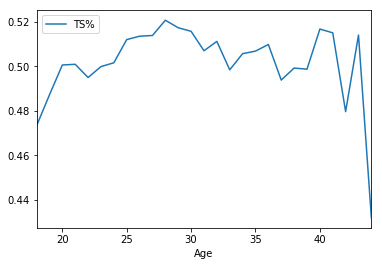

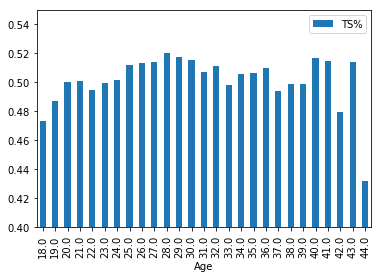

In [37]:
#age_value_TS_3pt.drop('Best_Age', inplace=True)
#age_value_TS_3pt.drop('Best_TS', inplace=True)
age_value_TS_3pt.plot()
age_value_TS_3pt.plot(ylim=(0.4,0.55),kind='bar')
plt.show()

Interesting to see that 40, 41 and 43 year old shoot as well as 28 year olds. This could be due to smaller sample size in the older ages since not many players play above 40. But again, peak TS% is age 28... Next we compare these results with all players.

In [38]:
grouped6 = df.groupby(["Player", "Age"]) 
player_age_TS = grouped6["TS%"].mean() 
player_age_TS = player_age_TS.unstack(level=-1)
player_age_TS

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.564000,0.599000,0.581000,0.594000,0.548000,0.556000,...,0.441,0.482,0.492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,0.190000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. English,NaN,NaN,NaN,NaN,NaN,0.480000,0.480000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,0.495000,0.477000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,0.472000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.530000,0.454000,0.454000,0.501000,0.469000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,0.215000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.535000,0.521000,0.549000,0.495667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
player_age_TS['Best_TS'] = player_age_TS.max(axis=1)
player_age_TS['Best_Age'] = player_age_TS.idxmax(axis=1)
player_age_TS

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,Best_TS,Best_Age
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,0.564000,0.599000,0.581000,0.594000,0.548000,0.556000,...,0.492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603000,29.0
A.J. Bramlett,NaN,NaN,NaN,NaN,NaN,0.190000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190000,23.0
A.J. English,NaN,NaN,NaN,NaN,NaN,0.480000,0.480000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,23.0
A.J. Guyton,NaN,NaN,NaN,NaN,0.495000,0.477000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495000,22.0
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,0.472000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.472000,24.0
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.530000,0.454000,0.454000,0.501000,0.469000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.530000,23.0
A.J. Wynder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387000,26.0
A.W. Holt,NaN,NaN,NaN,NaN,NaN,NaN,0.215000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215000,24.0
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.535000,0.521000,0.549000,0.495667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549000,25.0


In [40]:
age_value_TS = pd.DataFrame(player_age_TS.mean())
rn = {0:"TS%"}
age_value_TS = age_value_TS.rename(columns=rn)
age_value_TS

,TS%
Age,
18.0,0.471154
19.0,0.484636
20.0,0.501371
21.0,0.498971
22.0,0.480941
23.0,0.486438
24.0,0.489064
25.0,0.500223
26.0,0.502380


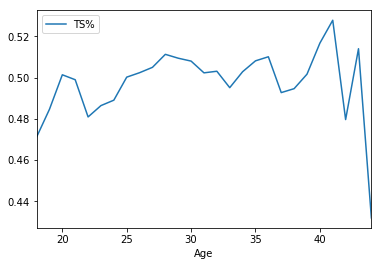

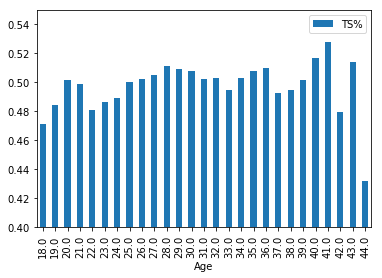

In [41]:
age_value_TS.drop('Best_Age', inplace=True)
age_value_TS.drop('Best_TS', inplace=True)
age_value_TS.plot()
age_value_TS.plot(ylim=(0.4,0.55),kind='bar')
plt.show()

Interesting results here - if we ignore the possible small sample size of 40+ year olds, the best TS% falls to 36 year olds. It is plausible that shooting is more of a developed skill than athleticism and performance; nevertheless, the introduction of the 3pt line definitley shifted a paradigm in the game.

Nex, we examine the introduction of the Development League in 2001 (D-League, now G-League).

In [42]:
df_DL = pd.DataFrame(nba)
#df-3pt = df[df.Year.notnull()]
df_DL = df_DL[df_DL['Year'] > 2000]
df_DL.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,WS,VORP
14967,2001.0,Mahmoud Abdul-Rauf,PG,31.0,VAN,41.0,486.0,16.7,0.514,0.7,-0.3
14968,2001.0,Tariq Abdul-Wahad,SG,26.0,DEN,29.0,420.0,5.8,0.438,-0.4,-0.4
14969,2001.0,Shareef Abdur-Rahim,SF,24.0,VAN,81.0,3241.0,19.1,0.549,8.5,3.5
14970,2001.0,Cory Alexander,PG,27.0,ORL,26.0,227.0,6.3,0.407,-0.1,-0.2
14971,2001.0,Courtney Alexander,PG,23.0,TOT,65.0,1382.0,11.6,0.484,0.8,-0.8


In [43]:
grouped7 = df_DL.groupby(["Player", "Age"]) 
player_age_VORP_DL = grouped7["VORP"].mean() 
player_age_VORP_DL = player_age_VORP_DL.unstack(level=-1)
player_age_VORP_DL

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,44.0
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.3,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Guyton,NaN,NaN,NaN,NaN,-0.600000,-0.400000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Price,NaN,NaN,NaN,NaN,NaN,0.000000,-0.300000,0.000000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000,1.600000,-0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Gordon,NaN,-0.2,1.800000,0.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Gray,NaN,NaN,NaN,NaN,NaN,0.000000,0.100000,0.133333,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Harrison,NaN,NaN,NaN,-0.1,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron McKie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
player_age_VORP_DL['Best_VORP'] = player_age_VORP_DL.max(axis=1)
player_age_VORP_DL['Best_Age'] = player_age_VORP_DL.idxmax(axis=1)
player_age_VORP_DL

ValueError: could not convert string to float: 'Best_Age'

In [46]:
age_value_VORP_DL = pd.DataFrame(player_age_VORP_DL.mean())
rn = {0:"VORP"}
age_value_VORP_DL = age_value_VORP_DL.rename(columns=rn)
age_value_VORP_DL

,VORP
Age,
18.0,-0.100000
19.0,-0.000725
20.0,0.265471
21.0,0.442296
22.0,0.435913
23.0,0.491116
24.0,0.621789
25.0,0.767532
26.0,0.807203


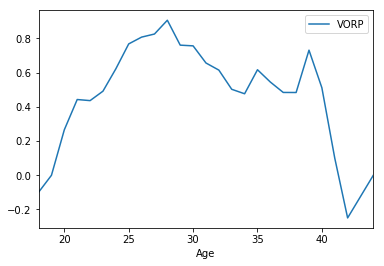

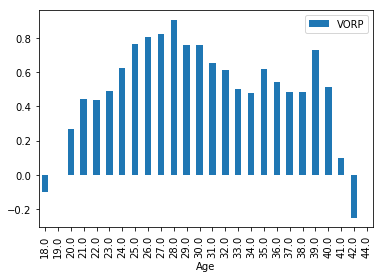

In [50]:
age_value_VORP_DL.drop('Best_VORP', inplace=True)
age_value_VORP_DL.drop('Best_MP', inplace=True)
age_value_VORP_DL.plot()
age_value_VORP_DL.plot(kind='bar')
plt.show()

Compared to the broad scope VORP chart, post-2001 VORP does not show the same spikes in 20/21 year olds. Presumably, the introduction the D-League took share of developing younger players before they reached the NBA. But suprisingly, the D-League seems to have dampened young-age performance. Perhaps younger players who are talented enough to contribute are sent to the D-League due to their age - if this is the case, it would explain the lower value in younger ages after 2001. But again, since the NBA and the world is dynamic, we cannot explicitly attribute a difference to one structural change.

## Summary

According to different analysis of performance, value, and durability, the "consensus" peak age persists at age 28. We notice a spike in playing time in 19-21 year olds and as well as VORP value among 20-21 year olds. This tells us that 19-21 year olds get playing time for development but the huge drop in VORP at age 19 shows us the development playing time pays off more at ages 20 and 21. We also notice that value development accelerates quicker before the peak age 28 compared to the deceleration after. In terms of basketball, it could be a player learning the game and developing physically in younger ages and persisitng after their peak age.  

We know some errors may have occured - some current players who aren't done with their career are included in the data. Also, players who came into the dataset in the middle of their career are also included in the lower limit. This should be reasonably averaged out over a period of 64 years but is a point to note. Also, value stats like WS and VORP utlize similar primitive stats so the correlation of shape could be stronger than expected. Furthermore, further split analysis of decades would have possibly shown more insights. 

Overall, our main question of peak age in the NBA seems to conclude at 28.